In [1]:
#importamos librerías
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import src.funciones_limpiar as fl

In [2]:
fl.suma(1,2) #ejemplo para entender el scr de las funciones

3

In [3]:
#abrimos el CSV
df = pd.read_csv("data/attacks.csv",encoding = "ISO-8859-1")

In [4]:
df.info() #hay nulos por todas partes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

In [5]:
df.dropna(how="all", inplace=True)
df.info() #borramos solo los nulos donde todos los registros de una fila son nulos

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8703 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null  

In [6]:
df.dropna(how="all", axis=1, inplace=True) #no hay ninguna columna en la que todo sea nan. Algún dato siempre tiene
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8703 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null  

In [7]:
df["Unnamed: 22"].value_counts()

stopped here    1
Name: Unnamed: 22, dtype: int64

In [8]:
df["Unnamed: 23"].value_counts()

Teramo             1
change filename    1
Name: Unnamed: 23, dtype: int64

In [9]:
df.drop(["Unnamed: 22", "Unnamed: 23"], axis=1, inplace=True) #borramos las dos columnas donde solo hay 1 o 2 datos, además las columnas no tienen nombre

In [10]:
df.info() #empiezo a hacer algunos chequeos para entender la info que tengo en el fichero

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8703 entries, 0 to 25722
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null  

In [11]:
tiburones = pd.DataFrame(df)
tiburones.head(2) #me doy cuenta de que tengo muchas filas de nan con casenumber 0

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0


In [12]:
type(tiburones) #confirmo que es un dataframe

pandas.core.frame.DataFrame

In [13]:
para_Casenumber = {"Case Number": "casenumber"} #le cambio el nombre a casenumber para que no tenga espacio

In [14]:
tiburones.rename(columns=para_Casenumber, inplace=True) 

In [15]:
tiburones.tail(2)

,casenumber,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
8701,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25722,xx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
tiburones.shape

(8703, 22)

In [17]:
tiburones[(tiburones.casenumber=="0")] #me quito los ids de 0

,casenumber,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
6302,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6304.0
6303,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6305.0
6304,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6306.0
6305,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6307.0
6306,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6308.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8697,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8698,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8699,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8700,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
tiburones2 = tiburones.drop(tiburones[tiburones['casenumber']=="0"].index) #eliminamos los  registros que tienen un casenumber cero y todos los datos nan
tiburones2.shape

(6303, 22)

In [19]:
tiburones2.head(2)

,casenumber,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0


In [20]:
tiburones2[(tiburones2.casenumber=="0")] #confirmamos

,casenumber,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order


In [21]:
tiburones2.shape #vamos acotando los registros

(6303, 22)

In [22]:
tiburones2.sample(2)

,casenumber,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
4300,1955.03.00.b,Mar-1955,1955.0,Unprovoked,PAPUA NEW GUINEA,"New Ireland, Bismarck Archipelago","Kabiman, West coast",Swimming with speared fish,"Lidua, a male",M,...,N,NaN,"""small brown-colored shark""",Namatanai Dept. of Public Health; A. M. Rapso...,1955.03.00.b-Liuda.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1955.03.00.b,1955.03.00.b,2003.0
2350,1995.08.26/b,26-Aug-1995,1995.0,Unprovoked,USA,Florida,"Crescent Beach, St. Johns County",Surfing,Brian Korth,M,...,N,18h30,5' shark,"Gainsville Sun, 8/30/1995",1995.08.26.b-Korth.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1995.08.26/b,1995.08.26/b,3953.0


In [23]:
#vamos a borrar las últimas columnas porque no sé muy bien cómo sacarles partido/qué me aportan. A partir de un primer análisis exploratorio, decidimos que no van a formar parte de nuestras hipótesis
tiburones2.drop(["pdf", "href formula", "href","Case Number.1","Case Number.2","original order"], axis=1, inplace=True)

In [24]:
tiburones2.sample(2)

,casenumber,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source
3051,1980.11.18,18-Nov-1980,1980.0,Unprovoked,AUSTRALIA,Western Australia,Lancelin,Swimming,"G.R. Bohan, an Able Seaman stationed on HMAS S...",M,NaN,"Right shoulder bitten, puncture wounds on ches...",N,NaN,NaN,"A. Sharpe, pp.133-134"
975,2010.10.25,25-Oct-2010,2010.0,Provoked,AZORES,NaN,350 miles from Faial Island,Fishing,crewman from the Gedi,M,NaN,PROVOKED INCIDENT?,N,NaN,NaN,"Jornal Diario, 10/26/2010"


In [25]:
tiburones2.shape #vamos acotando la tabla

(6303, 16)

In [26]:
tiburones2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6303 entries, 0 to 25722
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   casenumber              6302 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null  

In [27]:
#importamos algunas visualizaciones para ir viendo los datos

In [28]:
# Matplotlib inline para visualizar los gráficos de Matplotlib
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'

In [29]:
# Configuración para setear y que todas las fig de Seaborn salgan por defecto con este tamaño
# Se puede especificar el tamaño de cada figura
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")

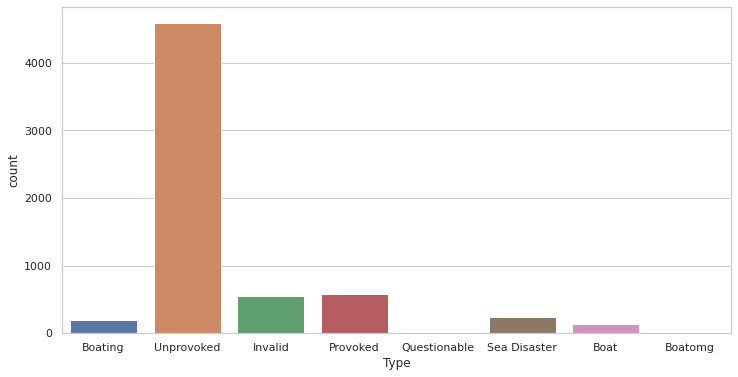

In [30]:
sns.countplot(x=tiburones2.Type);

In [31]:
tiburones2["Year"].value_counts()

2015.0    143
2017.0    136
2016.0    130
2011.0    128
2014.0    127
         ... 
1786.0      1
1785.0      1
1784.0      1
1783.0      1
1815.0      1
Name: Year, Length: 249, dtype: int64

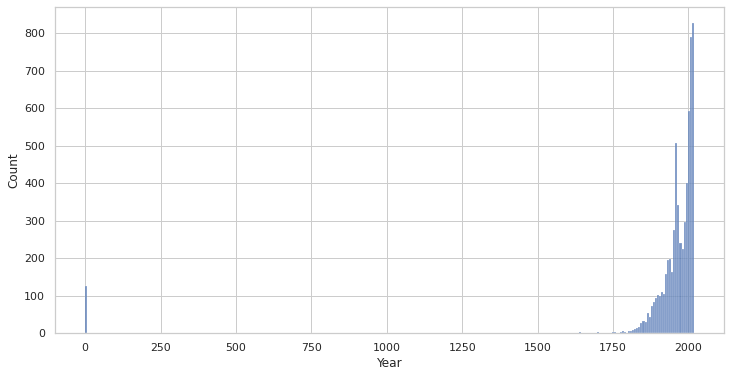

In [32]:
sns.histplot(x=tiburones.Year); #no podemos hacer porque tenemos varios registros con año 0

In [33]:
tiburones2[(tiburones2.Year==0)] 

,casenumber,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source
6177,0000.0214,Ca. 214 B.C.,0.0,Unprovoked,NaN,Ionian Sea,NaN,Ascending from a dive,"Tharsys, a sponge diver",M,NaN,"FATAL, shark/s bit him in two",Y,NaN,NaN,"Reported by Greek poet, Leonidas of Tarentum (..."
6178,0000.0336,Ca. 336.B.C..,0.0,Unprovoked,GREECE,Piraeus,In the haven of Cantharus,Washing his pig in preparation for a religious...,A candidate for initiation,M,NaN,"FATAL, shark ""bit off all lower parts of him u...",Y,NaN,NaN,Plutarch (45 - 125 A.D.) in Life of Phoecion (...
6179,0000.0493,493 B.C.,0.0,Sea Disaster,GREECE,Off Thessaly,NaN,Shipwrecked Persian Fleet,males,M,NaN,Herodotus tells of sharks attacking men in the...,Y,NaN,NaN,Herodotus (485 - 425 B.C.)
6180,0000.0725,Ca. 725 B.C.,0.0,Sea Disaster,ITALY,Tyrrhenian Sea,Krater found during excavations at Lacco Ameno...,Shipwreck,males,M,NaN,Depicts shipwrecked sailors attacked by a sha...,Y,NaN,NaN,"V.M. Coppleson (1958), p.262, et al"
6181,ND-0154,Before 1939,0.0,Unprovoked,CANADA,NaN,Grand Banks,Fishing,Joe Folsom,M,NaN,Arm bitten,N,NaN,NaN,"C.E.Russell, pp. 310-311"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, p. 234"
6298,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234"
6299,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF"
6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,FATAL,Y,NaN,NaN,"The Sun, 10/20/1938"


In [34]:
tiburones2["yearnuevo"] = tiburones2["Year"].apply(fl.omiteceros)
tiburones2[(tiburones2.Year==0)]

,casenumber,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,yearnuevo
6177,0000.0214,Ca. 214 B.C.,0.0,Unprovoked,NaN,Ionian Sea,NaN,Ascending from a dive,"Tharsys, a sponge diver",M,NaN,"FATAL, shark/s bit him in two",Y,NaN,NaN,"Reported by Greek poet, Leonidas of Tarentum (...",1700.0
6178,0000.0336,Ca. 336.B.C..,0.0,Unprovoked,GREECE,Piraeus,In the haven of Cantharus,Washing his pig in preparation for a religious...,A candidate for initiation,M,NaN,"FATAL, shark ""bit off all lower parts of him u...",Y,NaN,NaN,Plutarch (45 - 125 A.D.) in Life of Phoecion (...,1700.0
6179,0000.0493,493 B.C.,0.0,Sea Disaster,GREECE,Off Thessaly,NaN,Shipwrecked Persian Fleet,males,M,NaN,Herodotus tells of sharks attacking men in the...,Y,NaN,NaN,Herodotus (485 - 425 B.C.),1700.0
6180,0000.0725,Ca. 725 B.C.,0.0,Sea Disaster,ITALY,Tyrrhenian Sea,Krater found during excavations at Lacco Ameno...,Shipwreck,males,M,NaN,Depicts shipwrecked sailors attacked by a sha...,Y,NaN,NaN,"V.M. Coppleson (1958), p.262, et al",1700.0
6181,ND-0154,Before 1939,0.0,Unprovoked,CANADA,NaN,Grand Banks,Fishing,Joe Folsom,M,NaN,Arm bitten,N,NaN,NaN,"C.E.Russell, pp. 310-311",1700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, p. 234",1700.0
6298,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234",1700.0
6299,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",1700.0
6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,FATAL,Y,NaN,NaN,"The Sun, 10/20/1938",1700.0


1700.0

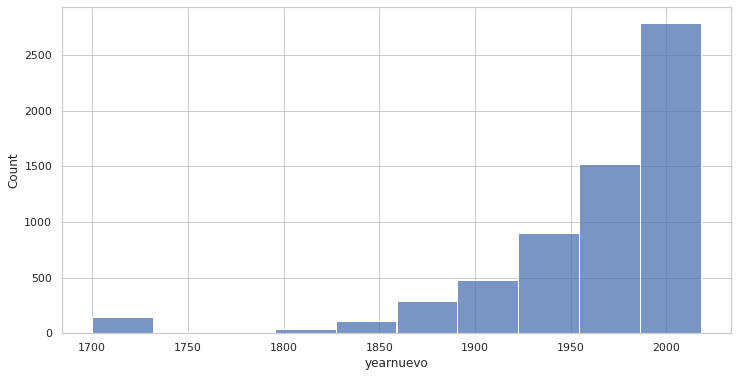

In [35]:
sns.histplot(x=tiburones2.yearnuevo, bins = 10); #hemos convertido los registros menores de 1700 a 1700 para poder tener una gráfica
tiburones2.yearnuevo.min()

In [36]:
tiburones2.columns

Index(['casenumber', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'yearnuevo'],
      dtype='object')

In [37]:
tiburones2.isna().sum() #no sé si vamos a poder utilizar Age, Time y especies, por ser las que más nulos tienen. 
#Si hubiera que prescindir de alguna, prescindiría de esas
#vamos a priorizar por country y type 

casenumber                   1
Date                         1
Year                         3
Type                         5
Country                     51
Area                       456
Location                   541
Activity                   545
Name                       211
Sex                        566
Age                       2832
Injury                      29
Fatal (Y/N)                540
Time                      3355
Species                   2839
Investigator or Source      18
yearnuevo                    3
dtype: int64

In [38]:
tiburones2.Country.unique() 

array(['USA', 'AUSTRALIA', 'MEXICO', 'BRAZIL', 'ENGLAND', 'SOUTH AFRICA',
       'THAILAND', 'COSTA RICA', 'MALDIVES', 'BAHAMAS', 'NEW CALEDONIA',
       'ECUADOR', 'MALAYSIA', 'LIBYA', nan, 'CUBA', 'MAURITIUS',
       'NEW ZEALAND', 'SPAIN', 'SAMOA', 'SOLOMON ISLANDS', 'JAPAN',
       'EGYPT', 'ST HELENA, British overseas territory', 'COMOROS',
       'REUNION', 'FRENCH POLYNESIA', 'UNITED KINGDOM',
       'UNITED ARAB EMIRATES', 'PHILIPPINES', 'INDONESIA', 'CHINA',
       'COLUMBIA', 'CAPE VERDE', 'Fiji', 'DOMINICAN REPUBLIC',
       'CAYMAN ISLANDS', 'ARUBA', 'MOZAMBIQUE', 'FIJI', 'PUERTO RICO',
       'ITALY', 'ATLANTIC OCEAN', 'GREECE', 'ST. MARTIN', 'FRANCE',
       'PAPUA NEW GUINEA', 'TRINIDAD & TOBAGO', 'KIRIBATI', 'ISRAEL',
       'DIEGO GARCIA', 'TAIWAN', 'JAMAICA', 'PALESTINIAN TERRITORIES',
       'GUAM', 'SEYCHELLES', 'BELIZE', 'NIGERIA', 'TONGA', 'SCOTLAND',
       'CANADA', 'CROATIA', 'SAUDI ARABIA', 'CHILE', 'ANTIGUA', 'KENYA',
       'RUSSIA', 'TURKS & CAICOS', 'UNITE

In [39]:
tiburones2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6303 entries, 0 to 25722
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   casenumber              6302 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null  

In [40]:
tiburones2.Area.unique() #exploramos los tipos de datos de cada variable

array(['California', 'Georgia', 'Hawaii', 'New South Wales', 'Colima',
       'Pernambuco', 'Florida', 'Queensland', 'South Carolina',
       'Cornwall', 'Westerm Australia', 'Eastern Cape Province',
       'Hua Hin', 'Cocos Island', 'Western Australia',
       'Alifu Alifu Atoll', 'Western Cape Province', 'New Providence',
       'Alagoas', nan, 'Victoria', 'KwaZulu-Natal',
       'Boi Island, Victoria', 'Galapagos Islands', 'Fernando de Noronha',
       'Sepang', 'Holquin Province', 'Pamplemousses ', 'South Australia',
       'North Island', 'New York', 'Canary Islands', ' Upolu Island',
       'Shizuoka Prefecture', 'Texas', 'Castellón', 'Massachusetts',
       'Red Sea Protectorate', 'New Providence District',
       '40 miles off Grand Bahama Island', 'Ascension Island',
       'New Jersey', 'Majorca', 'Washington', 'Tabasco', 'Anjouan',
       'Ibiza Island', 'Marquesas', 'South Devon', 'New Providence ',
       'Sharjah, ', 'Baja California Sur', 'Saint-Leu', 'South Island',
   

In [41]:
tiburones2.Location.unique() 

array(['Oceanside, San Diego County', 'St. Simon Island, Glynn County',
       'Habush, Oahu', ..., 'Ocracoke Inlet', 'Panama Bay 8ºN, 79ºW',
       'Below the English fort, Trincomalee'], dtype=object)

In [42]:
tiburones2["Sex "].unique() #no entiendo porqué no sale el sexo, pero no la priorizamos tampoco

array(['F', 'M', nan, 'M ', 'lli', 'N', '.'], dtype=object)

In [43]:
tiburones2.Activity.unique() 

array(['Paddling', 'Standing', 'Surfing', ...,
       'Crew swimming alongside their anchored ship',
       '4 men were bathing', 'Wreck of  large double sailing canoe'],
      dtype=object)

In [44]:
tiburones2.Injury.unique() 

array(['No injury to occupant, outrigger canoe and paddle damaged',
       'Minor injury to left thigh',
       'Injury to left lower leg from surfboard skeg', ...,
       'FATAL, leg stripped of flesh  ',
       'FATAL, knocked overboard by tail of shark & carried off by shark ',
       'FATAL. "Shark bit him in half, carrying away the lower extremities" '],
      dtype=object)

In [45]:
tiburones2["Investigator or Source"].unique() 

array(['R. Collier, GSAF', 'K.McMurray, TrackingSharks.com',
       'B. Myatt, GSAF', ..., 'F. Schwartz, p.23; C. Creswell, GSAF',
       'The Sun, 10/20/1938', 'S.W. Baker'], dtype=object)

In [46]:
#vamos a priorizar las variables más homogéneas y con menos Nan
#Las mejores opciones para seguir con nuestro análisis son:
tiburones2["Fatal (Y/N)"].unique() 

array(['N', 'Y', nan, 'M', 'UNKNOWN', '2017', ' N', 'N ', 'y'],
      dtype=object)

In [47]:
tiburones2["Fatal (Y/N)"].value_counts() 

N          4293
Y          1388
UNKNOWN      71
 N            7
M             1
2017          1
N             1
y             1
Name: Fatal (Y/N), dtype: int64

In [48]:
tiburones2["Type"].value_counts() 

Unprovoked      4595
Provoked         574
Invalid          547
Sea Disaster     239
Boating          203
Boat             137
Questionable       2
Boatomg            1
Name: Type, dtype: int64

In [49]:
tiburones2.head(2)

,casenumber,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,yearnuevo
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.0


In [50]:
renombrarsexyspecies = {"Sex ": "Sex", "Species ": "Species"} #había 1 espacio detrás del nombre de estas columnas

In [51]:
tiburones2.rename(columns=renombrarsexyspecies, inplace=True)

In [52]:
#voy a quedarme con una tabla con los casos, los typos, country, activity, fatal y year nuevo

In [53]:
type(tiburones2)

pandas.core.frame.DataFrame

In [54]:
tiburones2.drop(["Area","Year","Location","Name","Sex","Age","Injury","Time","Investigator or Source"], axis=1, inplace=True)

# Primera fase de la limpieza
Hemos conseguido limpiar hasta el momento los valores nulos generales, registros donde las filas completas son nan y filas de las que no vamos a sacar información. Podríamos decir que la primera fase de la limpieza está completada, ahora vamos con el tema de cada una de las columnas y los datos que hay en ellas

In [55]:
tiburones2.head(2)

,casenumber,Date,Type,Country,Activity,Fatal (Y/N),Species,yearnuevo
0,2018.06.25,25-Jun-2018,Boating,USA,Paddling,N,White shark,2018.0
1,2018.06.18,18-Jun-2018,Unprovoked,USA,Standing,N,NaN,2018.0


# Hipótesis:

1. Los  los ataques que se han provocado más, han sido pescando

2. Los ataques que más acaban en muerte son los de los surfistasa

3. En australia hay más ataques que en el resto del mundo porque el agua está más caliente, sobre todo en diciembre porque hay más turistas en navidad


Estamos investigando variable a variable de qué está compuesta y cómo poder alinear los valores

In [56]:
tiburones2.yearnuevo.fillna(1700, inplace=True)

In [57]:
tiburones2["yearnuevo"].unique() 

array([2018., 2017., 1700., 2016., 2015., 2014., 2013., 2012., 2011.,
       2010., 2009., 2008., 2007., 2006., 2005., 2004., 2003., 2002.,
       2001., 2000., 1999., 1998., 1997., 1996., 1995., 1984., 1994.,
       1993., 1992., 1991., 1990., 1989., 1969., 1988., 1987., 1986.,
       1985., 1983., 1982., 1981., 1980., 1979., 1978., 1977., 1976.,
       1975., 1974., 1973., 1972., 1971., 1970., 1968., 1967., 1966.,
       1965., 1964., 1963., 1962., 1961., 1960., 1959., 1958., 1957.,
       1956., 1955., 1954., 1953., 1952., 1951., 1950., 1949., 1948.,
       1848., 1947., 1946., 1945., 1944., 1943., 1942., 1941., 1940.,
       1939., 1938., 1937., 1936., 1935., 1934., 1933., 1932., 1931.,
       1930., 1929., 1928., 1927., 1926., 1925., 1924., 1923., 1922.,
       1921., 1920., 1919., 1918., 1917., 1916., 1915., 1914., 1913.,
       1912., 1911., 1910., 1909., 1908., 1907., 1906., 1905., 1904.,
       1903., 1902., 1901., 1900., 1899., 1898., 1897., 1896., 1895.,
       1894., 1893.,

In [58]:
tiburones2["yearnuevo"] = tiburones2["yearnuevo"].apply(fl.convierteaint)

In [59]:
tiburones2["yearnuevo"].unique() 

array([2018, 2017, 1700, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009,
       2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998,
       1997, 1996, 1995, 1984, 1994, 1993, 1992, 1991, 1990, 1989, 1969,
       1988, 1987, 1986, 1985, 1983, 1982, 1981, 1980, 1979, 1978, 1977,
       1976, 1975, 1974, 1973, 1972, 1971, 1970, 1968, 1967, 1966, 1965,
       1964, 1963, 1962, 1961, 1960, 1959, 1958, 1957, 1956, 1955, 1954,
       1953, 1952, 1951, 1950, 1949, 1948, 1848, 1947, 1946, 1945, 1944,
       1943, 1942, 1941, 1940, 1939, 1938, 1937, 1936, 1935, 1934, 1933,
       1932, 1931, 1930, 1929, 1928, 1927, 1926, 1925, 1924, 1923, 1922,
       1921, 1920, 1919, 1918, 1917, 1916, 1915, 1914, 1913, 1912, 1911,
       1910, 1909, 1908, 1907, 1906, 1905, 1904, 1903, 1902, 1901, 1900,
       1899, 1898, 1897, 1896, 1895, 1894, 1893, 1892, 1891, 1890, 1889,
       1888, 1887, 1886, 1885, 1884, 1883, 1882, 1881, 1880, 1879, 1878,
       1877, 1876, 1875, 1874, 1873, 1872, 1871, 18

In [60]:
tiburones2["Fatal (Y/N)"].unique() 

array(['N', 'Y', nan, 'M', 'UNKNOWN', '2017', ' N', 'N ', 'y'],
      dtype=object)

In [61]:
tiburones2["Fatal (Y/N)"] = tiburones2["Fatal (Y/N)"].apply(fl.homogeneizarfatal)

In [62]:
tiburones2["Fatal (Y/N)"].fillna("Unkown")

0             N
1             N
2             N
3             N
4             N
          ...  
6298          Y
6299          Y
6300          Y
6301          Y
25722    Unkown
Name: Fatal (Y/N), Length: 6303, dtype: object

In [63]:
tiburones2["Fatal (Y/N)"].unique() 

array(['N', 'Y', 'Unkown'], dtype=object)

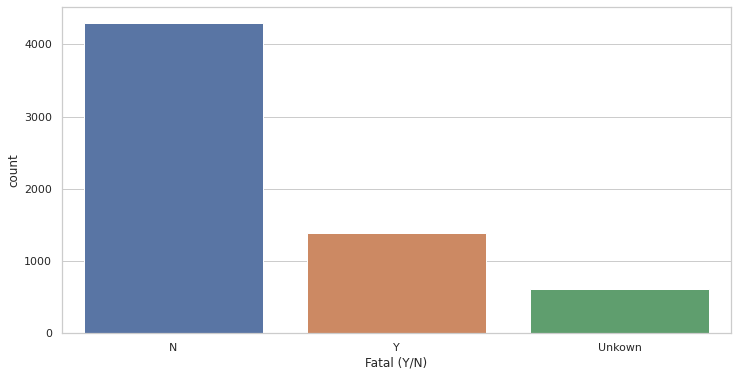

In [64]:
sns.countplot(x=tiburones2["Fatal (Y/N)"]);

In [65]:
a = list(tiburones2.Activity.unique())
print(a)

['Paddling', 'Standing', 'Surfing', 'Free diving', 'Kite surfing', 'Swimming', 'Fishing', 'Walking', 'Feeding sharks', 'Boogie boarding', 'Scuba diving', 'Paddle-skiing', 'Body boarding', 'Windsurfing', 'Stand-Up Paddleboarding', 'Wading', 'Scuba Diving', 'Kayak fishing for sharks', 'Cleaning fish', 'Snorkeling', 'Spearfishing', nan, 'Diving', 'Fishing / Wading', '2 boats capsized', 'Night bathing', 'Surfing ', 'Kayaking / Fishing', 'Kayaking', 'Body surfing', 'Swimming, poaching abalone', 'Canoeing', 'SUP', 'Skimboarding', 'Touching a shark', 'Fishing ', 'Attempting to lasso a shark', 'Photo shoot', 'Paddle boarding', 'Kakaying', 'Washing hands', 'Grabbing shark for a selfie', 'Kayak fishing', 'Tagging sharks', 'Surf skiing ', 'Surf fishing', 'Floating', 'Cage Diving', 'Surfng', 'SUP Foil boarding', 'Lobstering', 'Fishing in Alabama Deep Fishing Rodeo', 'Fishing for squid', 'Fishing for sharks', 'Floating in tube', 'Teasing a shark', 'Surf-skiing', 'Diving for beche-de-mer', 'Feeding 

In [66]:
tiburones2["Activity"].value_counts()

Surfing                                   971
Swimming                                  869
Fishing                                   431
Spearfishing                              333
Bathing                                   162
                                         ... 
Playing with a frisbee in the shallows      1
Sinking of the ferryboat Dumaguete          1
Wreck of the Storm King                     1
Feeding mullet to sharks                    1
Wreck of  large double sailing canoe        1
Name: Activity, Length: 1532, dtype: int64


# Utilizamos Country y Actividad
Para poder tener en cuenta las actividades y los países, hemos decidio quedarnos con los 5 valores más comunes que salen en el Value_counts, el resto lo llevaremos a otros y crearemos grupos sin tenerlos en cuenta

In [67]:
tiburones2["Activity"] = tiburones2["Activity"].apply(fl.homogeneizarActivity)

In [68]:
tiburones2["Activity"].unique() 

array(['Other', 'Surfing', 'Swimming', 'Fishing', 'Spearfishing',
       'Bathing'], dtype=object)

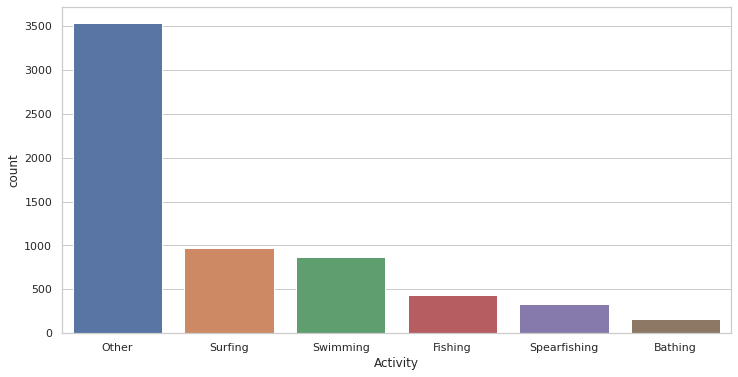

In [69]:
sns.countplot(x=tiburones2["Activity"]);

In [70]:
tiburones2.Country.value_counts()

USA                       2229
AUSTRALIA                 1338
SOUTH AFRICA               579
PAPUA NEW GUINEA           134
NEW ZEALAND                128
                          ... 
MALDIVE ISLANDS              1
NICARAGUA                    1
NORTH SEA                    1
RED SEA / INDIAN OCEAN       1
CEYLON (SRI LANKA)           1
Name: Country, Length: 212, dtype: int64

In [71]:
tiburones2["Country nuevo"] = tiburones2["Country"].apply(fl.homogeneizarpaises)

In [72]:
tiburones2["Country nuevo"].value_counts()

USA                 2229
AUSTRALIA           1338
SOUTH AFRICA         579
PAPUA NEW GUINEA     134
NEW ZEALAND          128
Name: Country nuevo, dtype: int64

In [73]:
#Vamos a ver si hay algún nan por ahí, por confirmar 

In [74]:
tiburones2['Country nuevo'].fillna('OTHER', inplace=True)

In [75]:
tiburones2.columns

Index(['casenumber', 'Date', 'Type', 'Country', 'Activity', 'Fatal (Y/N)',
       'Species', 'yearnuevo', 'Country nuevo'],
      dtype='object')

In [76]:
tiburones2.Date.isna().sum()

1

In [77]:
tiburones2['Date'].fillna('OTHER', inplace=True)

In [78]:
tiburones2.Date.isna().sum()

0

In [79]:
tiburones2.Type.isna().sum()

5

In [80]:
tiburones2['Type'].fillna('Questionable', inplace=True)

In [81]:
tiburones2.Type.isna().sum()

0

In [82]:
tiburones2.Activity.isna().sum()

0

In [83]:
tiburones2['Fatal (Y/N)'].isna().sum()

0

In [84]:
tiburones2['yearnuevo'].isna().sum()

0

In [85]:
tiburones2['Country nuevo'].isna().sum()

0

# Quitamos los "otros"
Para que no nos salgan los cajones desastre de cada categoría, hacemos un grupo no teniendo en cuenta estas categorías

In [86]:
activities = tiburones2[tiburones2["Activity"] != 'Other'] #haciendo este grupo nos quitamos los others

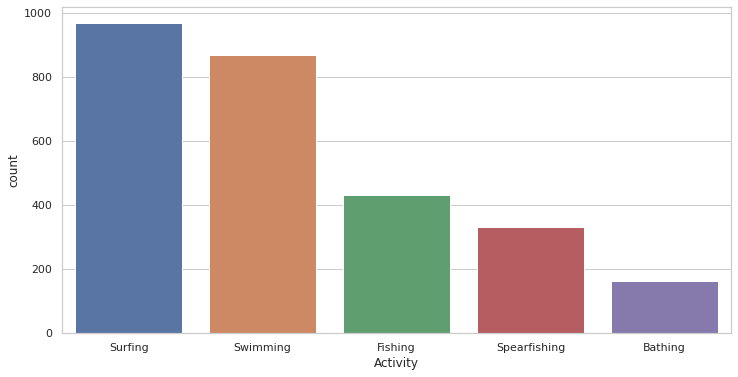

In [87]:
sns.countplot(x=activities["Activity"]);

In [88]:
countries = activities[activities["Country nuevo"] != 'OTHER'] #de esta manera nos quitamos también los other de countries

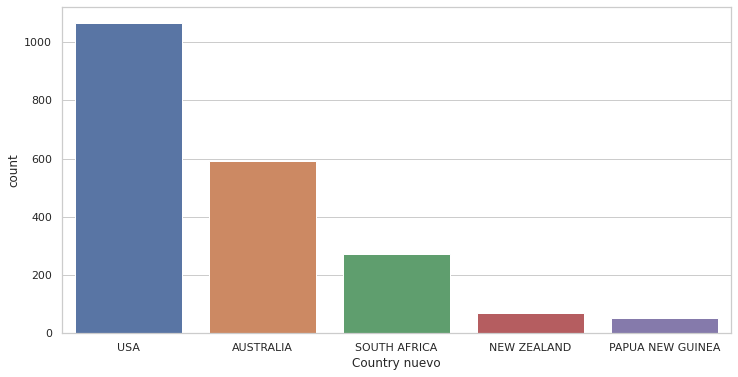

In [89]:
sns.countplot(x=countries["Country nuevo"]);

In [90]:
countries["Type"].unique() 

array(['Invalid', 'Unprovoked', 'Questionable', 'Boating', 'Provoked',
       'Boat', 'Boatomg', 'Sea Disaster'], dtype=object)

In [91]:
countries["Type"] = countries["Type"].apply(fl.homogeneizarType)

<ipython-input-91-85c188919e25>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countries["Type"] = countries["Type"].apply(fl.homogeneizarType)


In [92]:
countries["Type"].unique() 

array(['Questionable', 'Unprovoked', 'Provoked'], dtype=object)

In [93]:
countries.Date.fillna('Unknown', inplace=True)

/home/mariadelas/anaconda3/envs/ironhack/lib/python3.8/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


Aprovechamos para sacar partido a los meses ya que lo necesitaremos para saber si en australia los ataques se dan más en diciembre

In [94]:
countries["mes2"] = countries["Date"].apply(fl.mesBea)

<ipython-input-94-9551048a29fa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countries["mes2"] = countries["Date"].apply(fl.mesBea)


In [95]:
countries["mes2"].unique() 

array(['Juny', 'May', 'April', 'March', 'February', 'January', 'December',
       'November', 'October', 'September', 'August', 'July', 'Other'],
      dtype=object)

In [97]:
countries.to_csv("data/countries.csv")